In [128]:
#Importing the packages 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing

In [129]:
#Loading the dataset
data = pd.read_fwf("ecoli.data")
column_names = ["squence_name","mcg","gvh","lip","chg","aac","alm1","alm2","site"]
data.columns = column_names

In [130]:
#Checking whether the data has null values for the purposes of data cleaning
data.isnull().sum()

squence_name    0
mcg             0
gvh             0
lip             0
chg             0
aac             0
alm1            0
alm2            0
site            0
dtype: int64

In [131]:
data.shape

(335, 9)

In [132]:
data.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,0.500090,0.500627,0.495522,0.501493,0.499851,0.500955,0.500179
std,0.194924,0.147932,0.088624,0.027318,0.122515,0.215603,0.209563
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.490000,0.460000,0.430000
75%,0.665000,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [133]:
target = data.values[:,-1]

In [134]:
data.site.value_counts()

cp    142
im     77
pp     52
mU     35
om     20
mL      7
mS      2
Name: site, dtype: int64

In [135]:
#Cleaning dataset for the machine learning model
data.drop(['squence_name'], axis=1, inplace=True)
data = data.values
X, y = data[:,:-1], data[:,-1]
y = LabelEncoder().fit_transform(y)

In [136]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [137]:
# Initiating the decision tree 
decision_tree_model = DecisionTreeClassifier(max_depth=6, random_state=1)
random_forest_Model = RandomForestClassifier(n_estimators=100)

In [138]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [139]:
random_forest_Model.fit(X_train, y_train)

RandomForestClassifier()

In [140]:
random_forest_y_pred = random_forest_Model.predict(X_test)
decision_tree_y_pred = decision_tree_model.predict(X_test)

In [141]:
#Comparing the accuracy of the decision tree and random forest in classification
print(f"The random forest classification model accuracy: {metrics.accuracy_score(y_test, random_forest_y_pred)}")
print(f"The decision trees classification model accuracy: {metrics.accuracy_score(y_test, decision_tree_y_pred)}")

The random forest classification model accuracy: 0.8910891089108911
The decision trees classification model accuracy: 0.7722772277227723


In [160]:
random_performance = []
decision_performance = []
for i in range(len(y_pred)):
    if y_pred[i] == random_forest_y_pred[i]:
        if random_performance:
            random_performance.append(random_performance[-1]+1)
        else:
            random_performance.append(1)
    else:
        if random_performance:
            random_performance.append(random_performance[-1])
        else:
            random_performance.append(0)
    if y_pred[i] == decision_tree_y_pred[i]:
        if decision_performance:
            decision_performance.append(decision_performance[-1]+1)
        else:
            decision_performance.append(1)
    else:
        if decision_performance:
            decision_performance.append(decision_performance[-1])
        else:
            decision_performance.append(0)

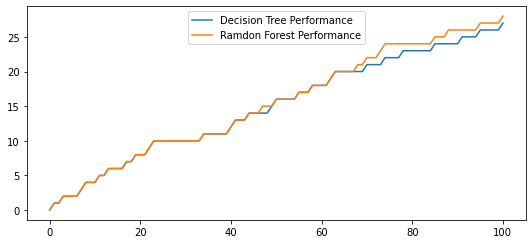

In [163]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(decision_performance, label="Decision Tree Performance")
line2, = plt.plot(random_performance, label="Ramdon Forest Performance")
leg = plt.legend(loc='upper center')
plt.show()

In [150]:
np.sum(random_performance)

33